# 3NN : 어디가 BlueOcean일까?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'NanumSquareOTF_ac'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

## 데이터 불러오기

In [3]:
df = pd.read_csv('final_final_data.csv', index_col ='시군구코드')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 41115 to 11740
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   시군구명               66 non-null     object 
 1   행정구역별(1)           66 non-null     object 
 2   2022년08월_총인구수      66 non-null     float64
 3   2022년08월_세대수       66 non-null     float64
 4   2022년08월_세대당 인구    66 non-null     float64
 5   2022년08월_남자 인구수    66 non-null     float64
 6   2022년08월_여자 인구수    66 non-null     float64
 7   2022년09월_총인구수      66 non-null     float64
 8   2022년09월_세대수       66 non-null     float64
 9   2022년09월_세대당 인구    66 non-null     float64
 10  2022년09월_남자 인구수    66 non-null     float64
 11  2022년09월_여자 인구수    66 non-null     float64
 12  관광/여가/오락           66 non-null     int64  
 13  부동산                66 non-null     int64  
 14  생활서비스              66 non-null     int64  
 15  소매                 66 non-null     int64  
 16  숙박                 66

In [4]:
df.head()

,시군구명,행정구역별(1),2022년08월_총인구수,2022년08월_세대수,2022년08월_세대당 인구,2022년08월_남자 인구수,2022년08월_여자 인구수,2022년09월_총인구수,2022년09월_세대수,2022년09월_세대당 인구,...,순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),시도간전입 (명),시도간전출 (명),pol_q3,surv,gmean,target
시군구코드,,,,,,,,,,,,,,,,,,,,,
41115,수원시,경기도,185563.0,93168.0,1.99,93446.0,92117.0,189267.0,94615.0,2.00,...,4118,21536,12306,9988,10502,8702,0.014667,50.649351,8.180550,4.0
41135,성남시,경기도,483644.0,195494.0,2.47,234495.0,249149.0,482562.0,194931.0,2.48,...,-3571,11030,5866,9041,7736,8132,0.014222,60.535420,4.998140,3.0
41150,의정부시,경기도,464310.0,208680.0,2.22,228406.0,235904.0,463160.0,207988.0,2.23,...,519,7494,3327,3818,4883,3873,0.013000,30.068729,5.574986,1.0
41173,안양시,경기도,314855.0,125462.0,2.51,154261.0,160594.0,314005.0,125027.0,2.51,...,-606,6415,4348,4924,4167,4197,0.014500,60.692525,5.459632,3.0
41190,부천시,경기도,796575.0,346565.0,2.30,394605.0,401970.0,793519.0,345010.0,2.30,...,-3729,6040,2679,4035,6843,9216,0.017167,34.616748,5.337536,1.0


## 데이터 feature별 묶음

In [5]:
#[target]
target = ['target']
#[dtype]
fcol = list(df.select_dtypes('float64').columns)
fcol.remove('target')
icol = list(df.select_dtypes('int64').columns)
ocol = list(df.select_dtypes('object').columns)

#[pop]
gcol1 = ['2022년08월_총인구수', '2022년08월_세대수', '2022년08월_세대당 인구','2022년08월_남자 인구수', '2022년08월_여자 인구수', '2022년09월_총인구수', '2022년09월_세대수','2022년09월_세대당 인구', '2022년09월_남자 인구수', '2022년09월_여자 인구수']

#[업종]
gcol21=['관광/여가/오락','부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육', '기타음식업'] 
gcol22=['닭/오리요리','별식/퓨전요리', '부페', '분식', '양식', '유흥주점', '음식배달서비스', '일식/수산물', '제과제빵떡케익','중식', '커피점/카페', '패스트푸드', '한식']

#[평균거리]
gcol3 =['centroid_dist']

#[주택]
gcol4=['매매호수21', '매매면적(천㎡)']

#[이동]
gcol5=['총전입 (명)', '총전출 (명)', '순이동 (명)', '시도내이동-시군구내 (명)', '시도내이동-시군구간 전입 (명)','시도내이동-시군구간 전출 (명)', '시도간전입 (명)', '시도간전출 (명)']

#[아산화질소 오염지수]
gcol6= ['pol_q3']

## 데이터 분석

## What is 블루오션?
### 성장률 vs 안정성 MATRIX

|구분|성장성 low|성장성 high|
| -- | --  |--|
|안전성 low|1|4|
|안전성 high |2|3|

- 안정성 < 44% and 성장률 < 6% = 1
- 안정성 < 44% and 성장률 > 6% = 2
- 안정성 > 44% and 성장률 < 6% = 3
- 안정성 > 44% and 성장률 > 6% = 4


> **성장률** : 3분기 기준 평균성장률</br>
> **안정성** : 8분기간 평균 생존률

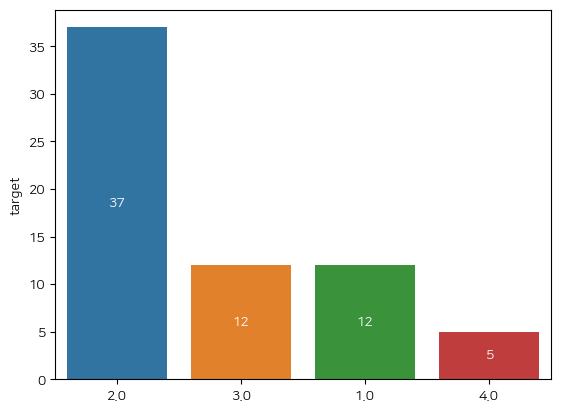

In [6]:
data = df['target'].value_counts()
ax = sns.barplot(data=data, x= data.index.astype(str), y=data)
ax.bar_label(ax.containers[0], label_type='center', color ='white')
plt.show()

### 인구수 관련

상관계수로 봤을때 상관계수 수치가 높은 것이 많은 것으로 보임. 전처리 과정에서 몇개는 제외해야겠음

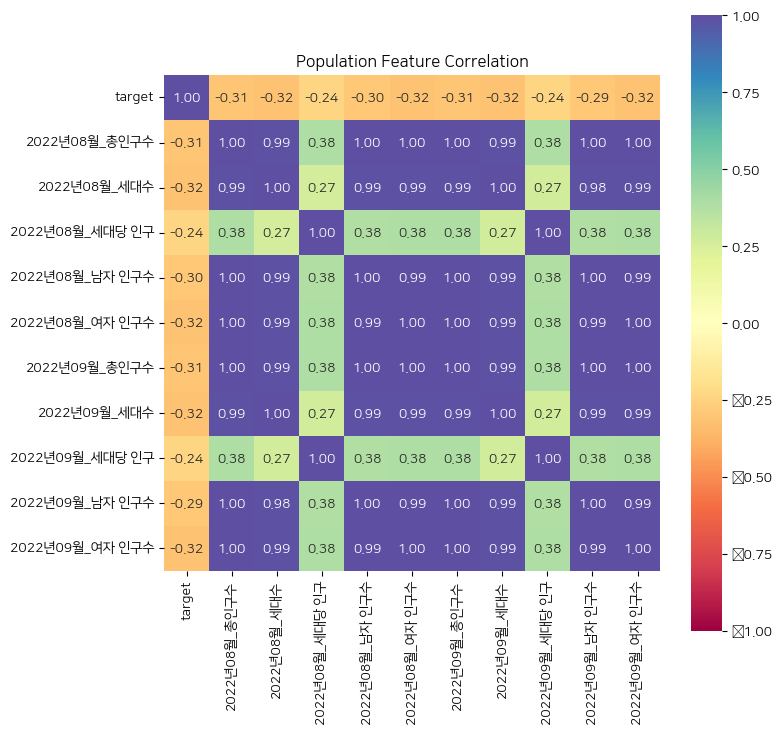

In [7]:
fig =plt.figure(figsize=(8,8))
sns.heatmap(df[target+gcol1].corr(), annot=True, square=True, fmt='0.2f', vmax=1, vmin=-1, cmap='Spectral')
plt.title("Population Feature Correlation")
plt.show()

In [8]:
def hist_box(data, col, target) :
    '''
    Creates a 1 x 2 plot; first one histogram, second boxplot
    '''
    fig = plt.figure(figsize = (10,4))
    axes = fig.add_subplot(1,2,1)
    sns.histplot(data=data, x=col)
    plt.title(f'{col} histogram')
    
    axes = fig.add_subplot(1,2,2)
    sns.boxplot(data=data, y=col, x=target)
    plt.title(f'{col} vs {target}')
    
    plt.tight_layout()
    plt.show()

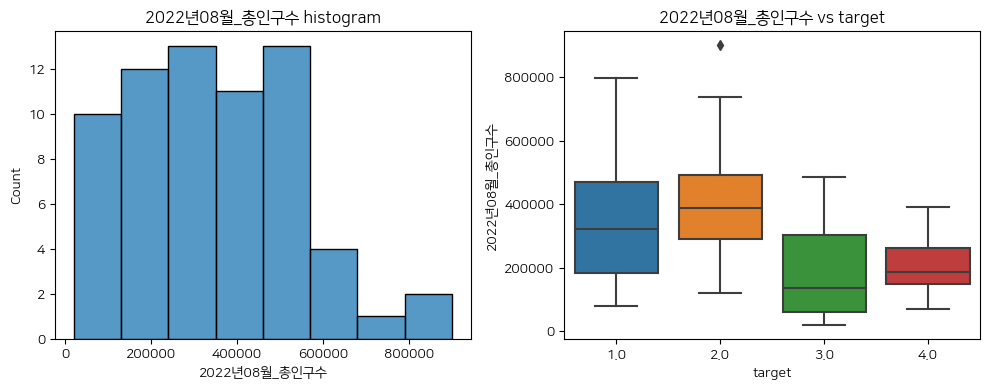

In [9]:
hist_box(df,'2022년08월_총인구수','target')

적합지 유의미하지 않아, 증감률로 확인

In [95]:
#인구증감률'
df['인구증감률'] = (df['2022년09월_총인구수'] - df['2022년08월_총인구수']) /df['2022년08월_총인구수'] *100

#남녀 비율
df['남녀비율9월'] = df['2022년09월_여자 인구수']/ df['2022년09월_총인구수'] *100

fcol.extend(['인구증감률','남녀비율9월'])

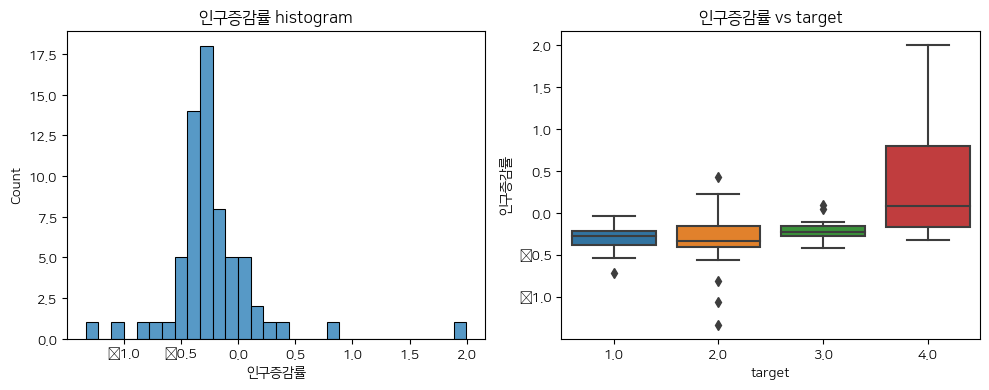

In [11]:
#인구증감률'
hist_box(df,'인구증감률','target')

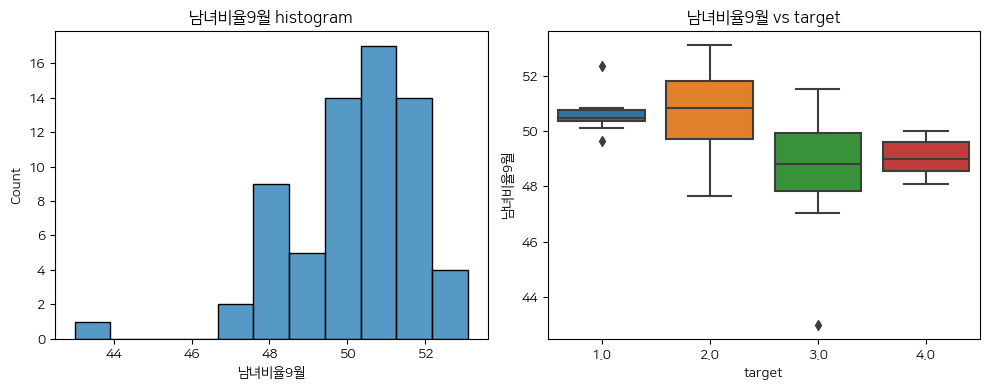

In [96]:
#남녀 비율
hist_box(df,'남녀비율9월','target')

> 연령? 시간상 못함

### 전입 전출 인구

In [24]:
gcol5=['총전입 (명)', '총전출 (명)', '순이동 (명)', '시도내이동-시군구내 (명)', '시도내이동-시군구간 전입 (명)','시도내이동-시군구간 전출 (명)', '시도간전입 (명)', '시도간전출 (명)']

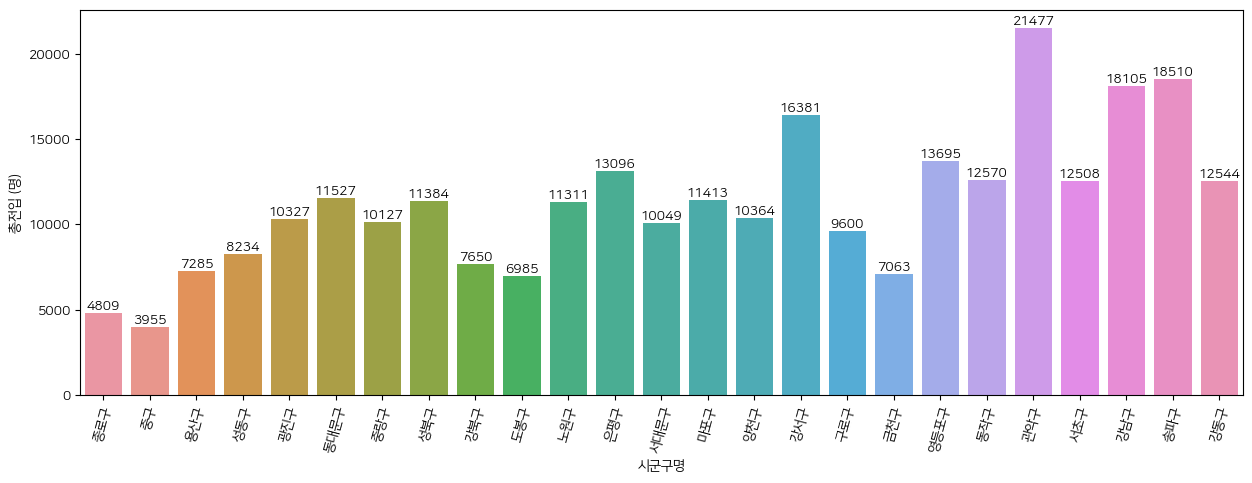

In [25]:
fig = plt.figure(figsize=(15,5))
ax =sns.barplot(data=df[df['행정구역별(1)']=='서울특별시'],x='시군구명', y='총전입 (명)')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=75)
plt.show()

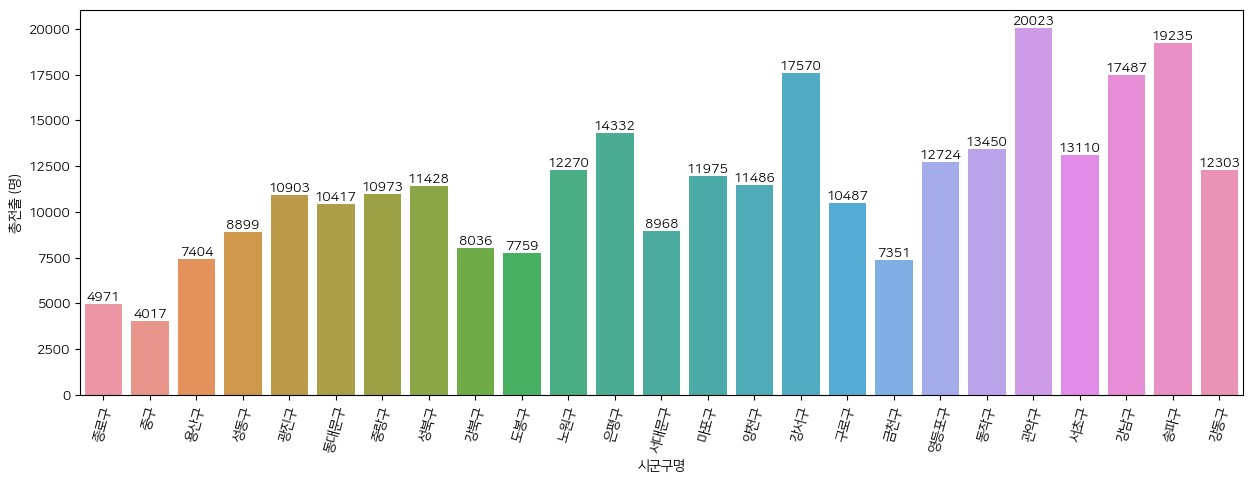

In [26]:
fig = plt.figure(figsize=(15,5))
ax =sns.barplot(data=df[df['행정구역별(1)']=='서울특별시'],x='시군구명', y='총전출 (명)')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=75)
plt.show()

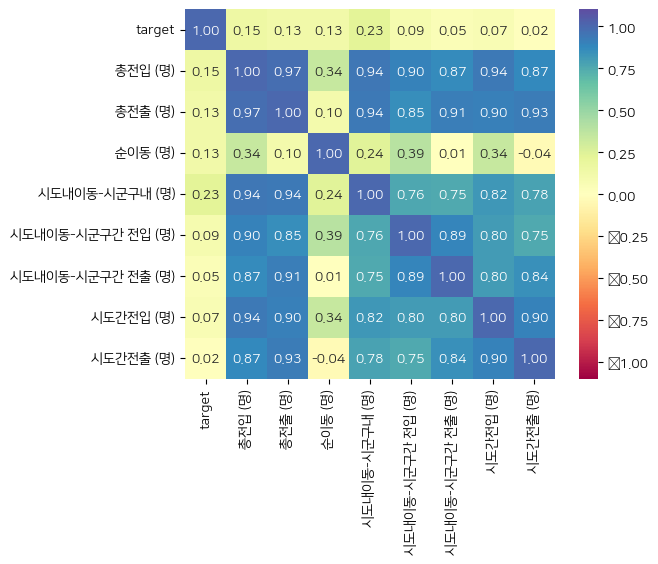

In [27]:
sns.heatmap(df[target + gcol5].corr(), annot=True, fmt='0.2f', square=True, cmap ='Spectral', vmax=1.1, vmin=-1.1)
plt.show()

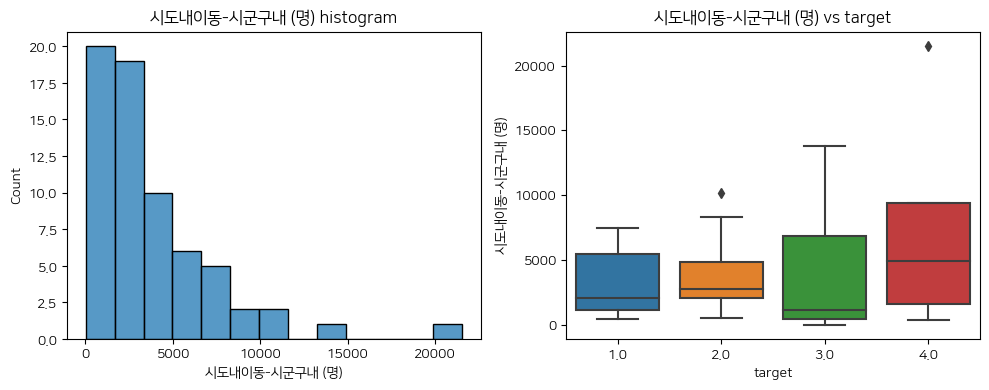

In [28]:
hist_box(df,'시도내이동-시군구내 (명)', 'target')

### 업종관련

### 대분류

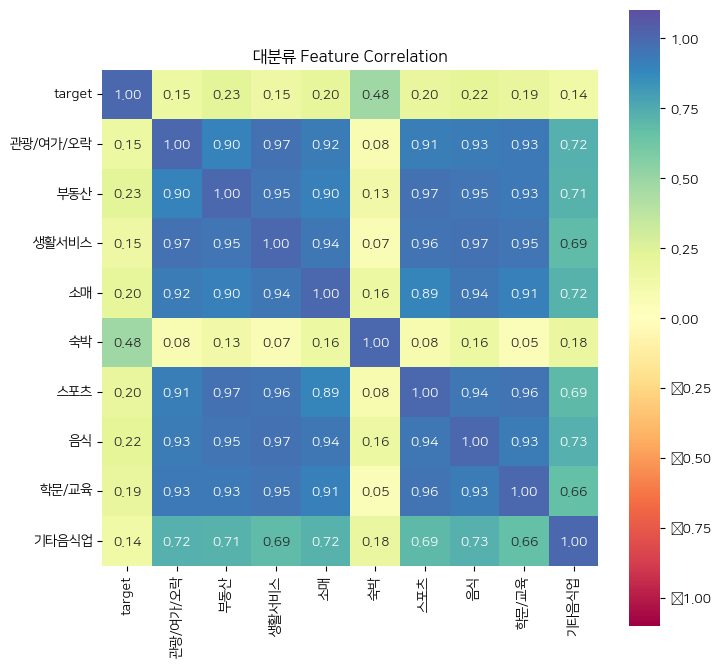

In [13]:
fig =plt.figure(figsize=(8,8))
sns.heatmap(df[target+gcol21].corr(), annot=True, square=True, fmt='0.2f', cmap='Spectral', vmax=1.1,vmin=-1.1)
plt.title("대분류 Feature Correlation")
plt.show()

표준편차 사용 이유

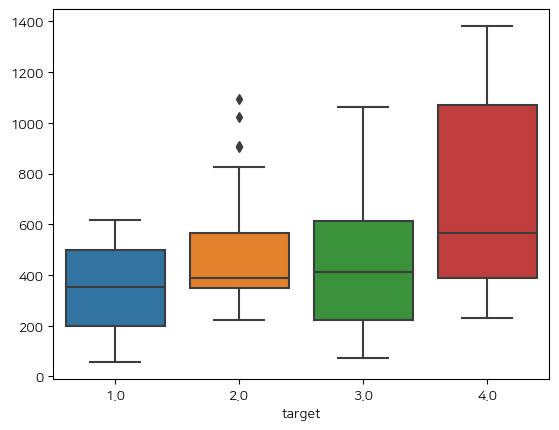

In [14]:
#업종간 표준편차값이 target의 영향을 칠까?
sns.boxplot(data=df ,y= df[gcol22].std(axis=1),x ='target')
plt.show()

In [15]:
df['대분류분포'] = df[gcol21].std(axis=1)
gcol21.append('대분류분포')
fcol.append('대분류분포')

### 중분류 : 음식

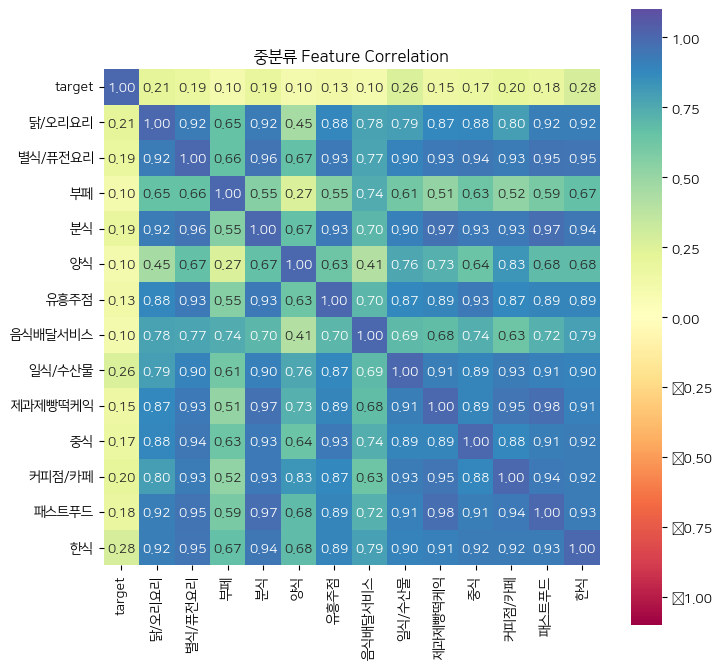

In [16]:
fig =plt.figure(figsize=(8,8))
sns.heatmap(df[target+gcol22].corr(), annot=True, square=True, fmt='0.2f', cmap='Spectral', vmax=1.1,vmin=-1.1)
plt.title("중분류 Feature Correlation")
plt.show()

In [17]:
df['중분류분포'] = df[gcol22].std(axis=1)
gcol22.append('중분류분포')
fcol.append('중분류분포')

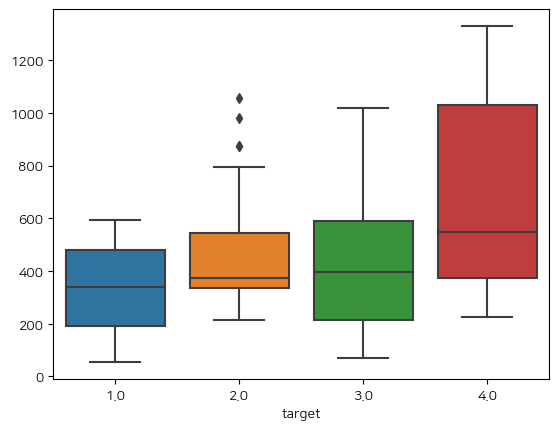

In [18]:
#업종간 표준편차값이 target의 영향을 미칠까?
sns.boxplot(data=df ,y= df[gcol22].std(axis=1),x ='target')
plt.show()

### 주택

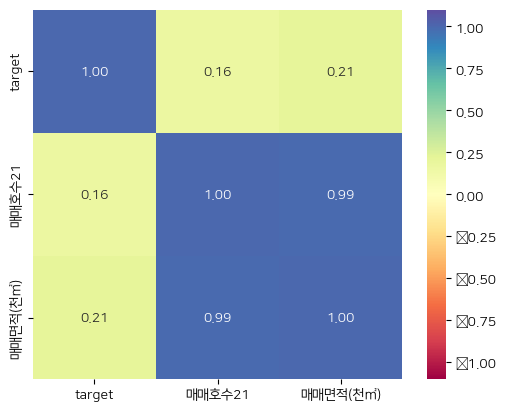

In [22]:
sns.heatmap(df[target + gcol4].corr(), annot=True, fmt='0.2f', square=True, cmap ='Spectral', vmax=1.1, vmin=-1.1)
plt.show()

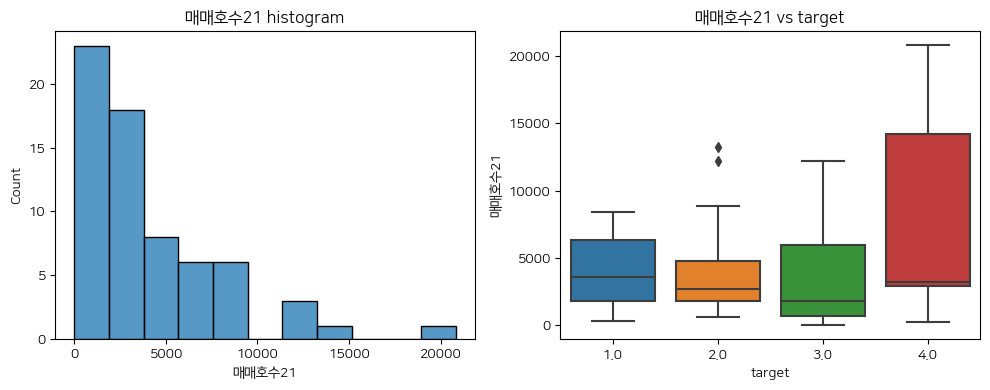

In [23]:
hist_box(df, '매매호수21', 'target')

### 거리

In [19]:
df[target + gcol3].corr()

,target,centroid_dist
target,1.000000,0.461123
centroid_dist,0.461123,1.000000


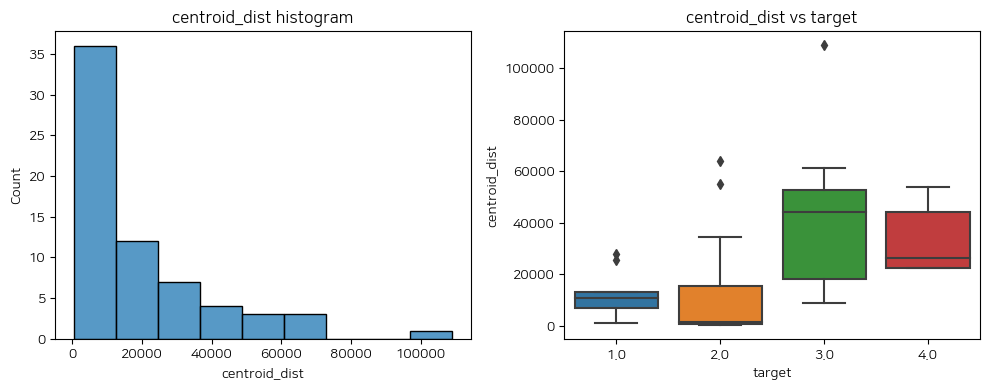

In [20]:
hist_box(df,'centroid_dist' ,'target')

In [21]:
#[이동]
gcol5=['총전입 (명)', '총전출 (명)', '순이동 (명)', '시도내이동-시군구내 (명)', '시도내이동-시군구간 전입 (명)','시도내이동-시군구간 전출 (명)', '시도간전입 (명)', '시도간전출 (명)']

#[일산화탄소]
gcol6= ['pol_q3']

### 이산화질소 오염 지수

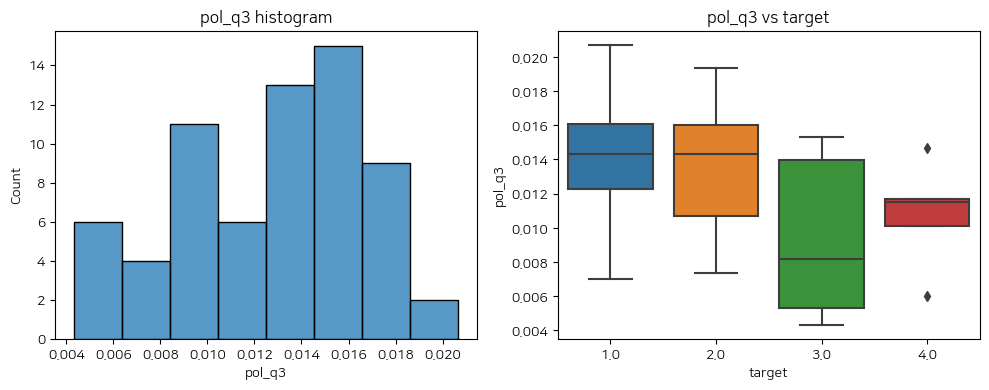

In [29]:
hist_box(df,'pol_q3', 'target')

### float

In [30]:
len(fcol)

32

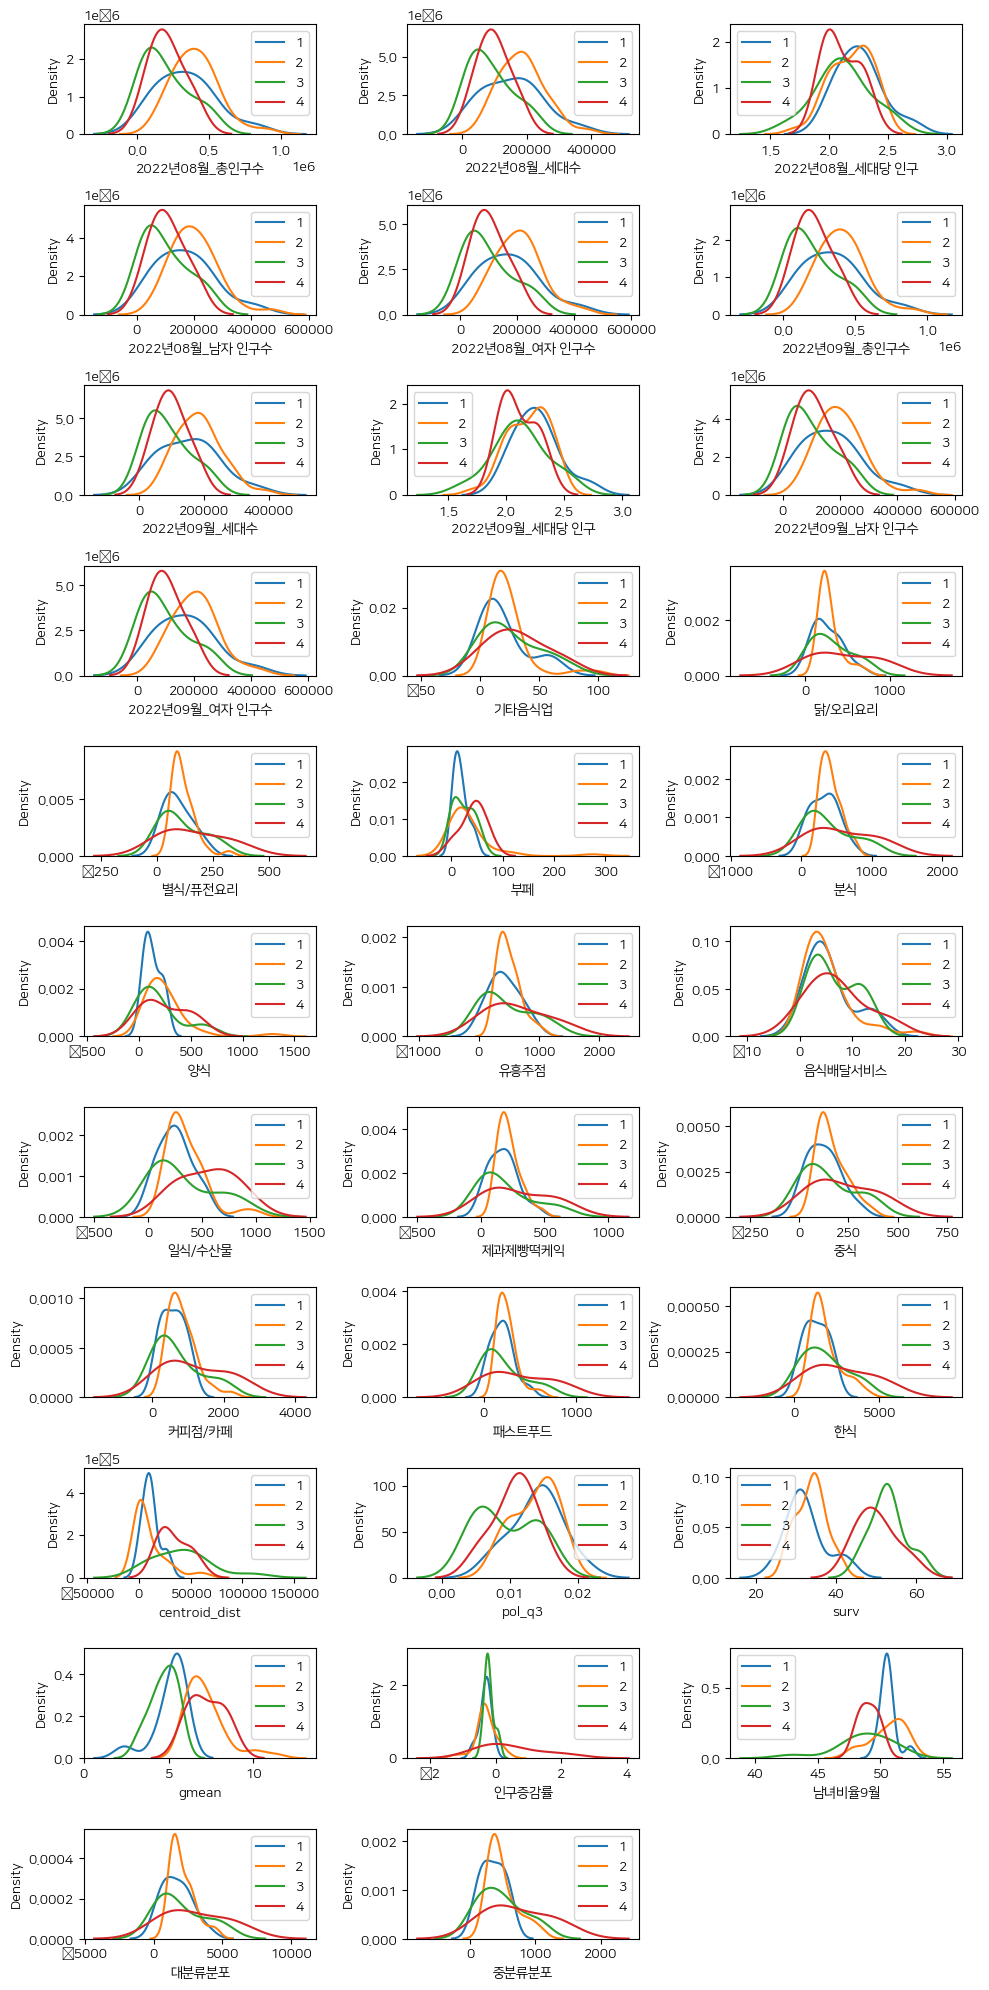

In [31]:
fig = plt.figure(figsize = (10,20))
for i, col in enumerate(fcol) :
    ax = fig.add_subplot(11,3,i+1)
    sns.kdeplot(data=df[df['target']==1], x=col, label='1')
    sns.kdeplot(data=df[df['target']==2], x=col, label='2')
    sns.kdeplot(data=df[df['target']==3], x=col, label='3')
    sns.kdeplot(data=df[df['target']==4], x=col, label='4')
    plt.legend()
plt.tight_layout()
plt.show()

`2022년08월_총인구수` , `2022년09월_총인구수` , `2022년08월_여자 인구수`, 업종 카테고리는 큰 영향을 미치지 못하는 것으로 보임

### int

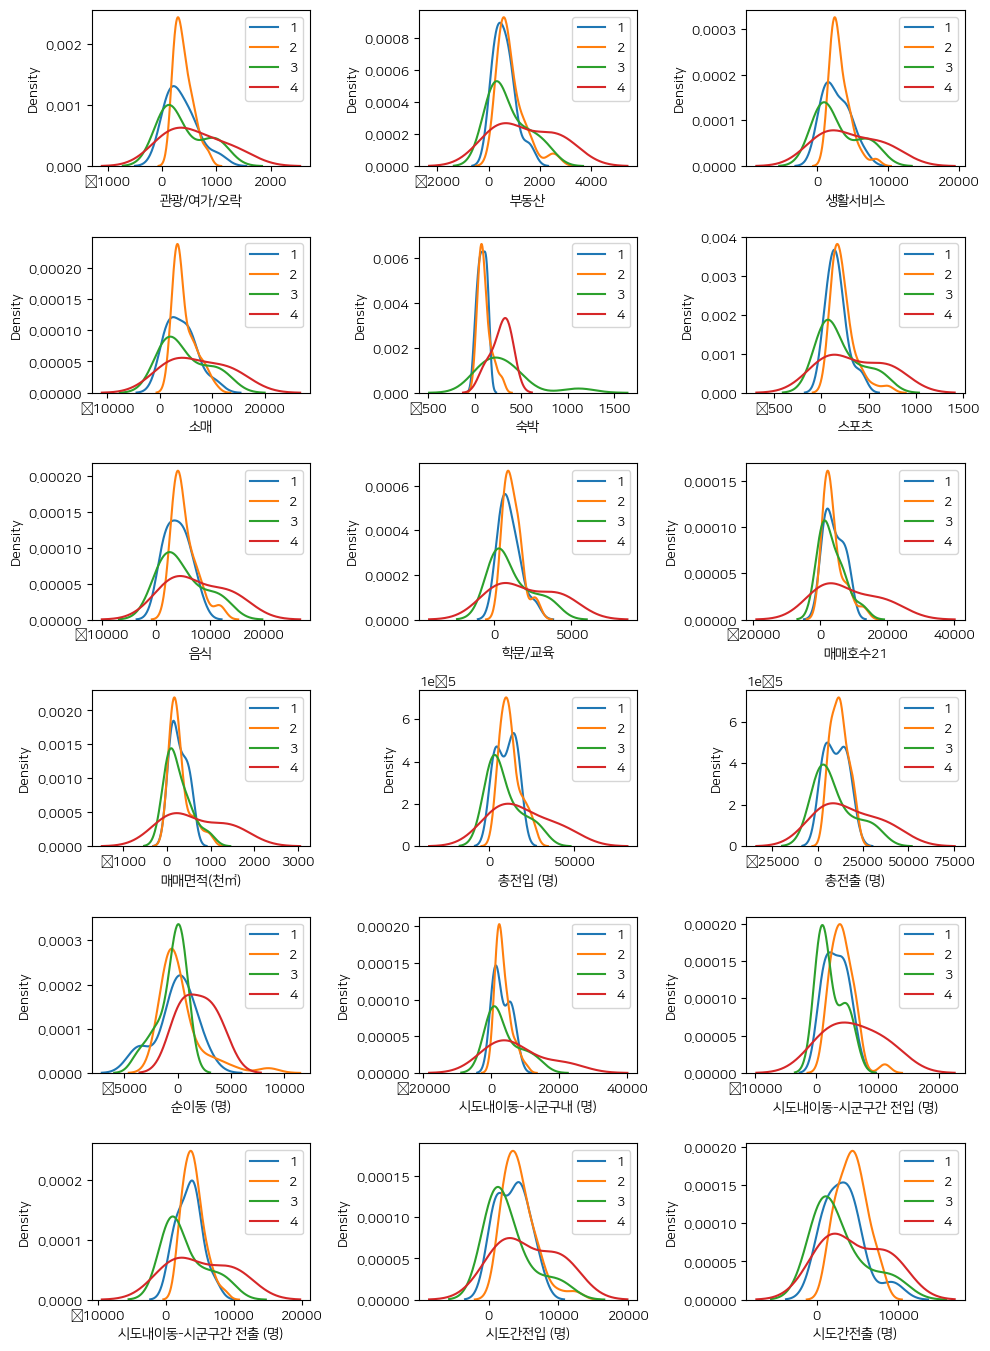

In [32]:
fig = plt.figure(figsize = (10,20))
for i, col in enumerate(icol) :
    ax = fig.add_subplot(9,3,i+1)
    sns.kdeplot(data=df[df['target']==1], x=col, label='1')
    sns.kdeplot(data=df[df['target']==2], x=col, label='2')
    sns.kdeplot(data=df[df['target']==3], x=col, label='3')
    sns.kdeplot(data=df[df['target']==4], x=col, label='4')
    plt.legend()
plt.tight_layout()
plt.show()

`총 전출`, `총 전입`, `시도내이동-시군구내 전입 (명)` ,  `시도내이동-시군구간 전입 (명)`, `시도내이동-시군구간 전출 (명)`, `시도간전입 (명)`, `시도간전출 (명)` 등 인구 이동성에 약간의 영향을 미치는 것 같이 보임

## Feature Selection & Feature Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
features = ['숙박', '일식/수산물',  '한식', 'centroid_dist', '매매호수21', '매매면적(천㎡)','총전입 (명)', '시도간전입 (명)', '시도간전출 (명)', 'pol_q3', '인구증감률', '남녀비율9월', '대분류분포', '중분류분포']

In [35]:
X = df[features].values
y = df[target].values

### feature scaling

In [36]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

### train, test split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35 , random_state=4 )

In [104]:
pd.DataFrame(y_test).value_counts(normalize=True)

2.0    0.541667
1.0    0.208333
3.0    0.166667
4.0    0.083333
dtype: float64

## Modeling

In [38]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [88]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
dtc = DecisionTreeClassifier(random_state=5)
svc = SVC()
knc = KNeighborsClassifier(n_neighbors=4)
lg = LogisticRegression()

In [89]:
models = {'rfc':rfc,'dtc':dtc,'svc':svc,'knc':knc,'lg':lg}

In [90]:
f1df = {}
for i,model in models.items() :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1score = f1_score(y_test, pred,average='macro')
    f1df[model.__class__.__name__] = f1score
    print('Model : {}; f1-score : {}'.format(model.__class__.__name__,f1score))

Model : RandomForestClassifier; f1-score : 0.3907407407407407
Model : DecisionTreeClassifier; f1-score : 0.4205128205128205
Model : SVC; f1-score : 0.319327731092437
Model : KNeighborsClassifier; f1-score : 0.3650793650793651
Model : LogisticRegression; f1-score : 0.25476190476190474


In [91]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.25      0.20      0.22         5
         2.0       0.71      0.77      0.74        13
         3.0       0.50      0.75      0.60         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.58        24
   macro avg       0.37      0.43      0.39        24
weighted avg       0.52      0.58      0.55        24



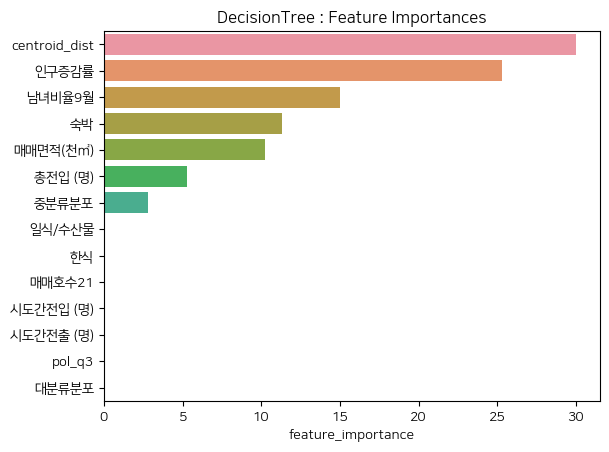

In [92]:
a = {'feature_importance':list(dtc.feature_importances_*100)}
fi = pd.DataFrame(data=a, index = features)
b = fi['feature_importance'].sort_values(ascending=False)
sns.barplot(b,b.index)
plt.title('DecisionTree : Feature Importances')
plt.show()

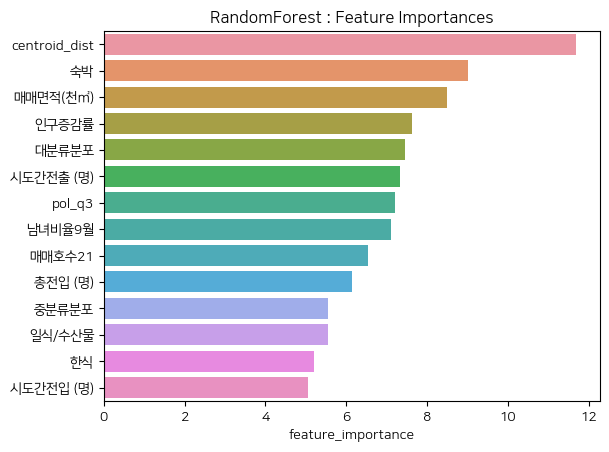

In [97]:
a = {'feature_importance':list(rfc.feature_importances_*100)}
fi = pd.DataFrame(data=a, index = features)
b = fi['feature_importance'].sort_values(ascending=False)
sns.barplot(b,b.index)
plt.title('RandomForest : Feature Importances')
plt.show()

### Conclusion

- 시장의 성장과 안정성은 인구 유입/유출에 상관관계가 있을 것이다? okay

- 시장의 성장과 안정성은 대기오염과 음상관관계가 있을 것이다? okay

- 시장의 성장과 안정성은 경제활동 밀집도와 상관관계가 있을 것이다? okay

- 상권은 주변 주요시설과의 인접거리와 상관 관계가 있을 것이다? okay